In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df1=pd.read_excel('Cleaned_datasets/Test.xlsx')
df1.head()

,Player ID,Matches,Innings,NO,Runs,Avg,100,50,0
0,35320,200,329,33,15921,53.78,51,68,14
1,28114,163,284,32,13265,52.63,36,63,7
2,28794,125,214,16,10122,51.12,34,45,12
3,253802,123,210,13,9230,46.85,30,31,15
4,30750,134,225,34,8781,45.97,17,56,14


In [3]:
players=pd.read_csv('Cleaned_datasets/Players.csv')
players.head()

,Player ID,Player Name,Batting Style,Bowling Style,Playing Role,Test Batting Pos,ODI Batting Pos,T20I Batting Pos,Bowling Type
0,35320,Sachin Ramesh Tendulkar,Right hand Bat,"Right arm Offbreak, Legbreak Googly",Top order Batter,Middle Order,Openers,Openers,Spin
1,253802,Virat Kohli,Right hand Bat,Right arm Medium,Top order Batter,Middle Order,Top Order,Top Order,Right-arm Pacer
2,28114,Rahul Sharad Dravid,Right hand Bat,Right arm Offbreak,Top order Batter,Top Order,Middle Order,Top Order,Spin
3,34102,Rohit Gurunath Sharma,Right hand Bat,Right arm Offbreak,Top order Batter,Openers,Openers,Openers,Spin
4,28779,Sourav Chandidas Ganguly,Left hand Bat,Right arm Medium,Batter,Middle Order,Openers,NaN,Right-arm Pacer


# Batting

In [4]:
batsmen=players.merge(df1,how='right')

In [5]:
batsmen.head()

,Player ID,Player Name,Batting Style,Bowling Style,Playing Role,Test Batting Pos,ODI Batting Pos,T20I Batting Pos,Bowling Type,Matches,Innings,NO,Runs,Avg,100,50,0
0,35320,Sachin Ramesh Tendulkar,Right hand Bat,"Right arm Offbreak, Legbreak Googly",Top order Batter,Middle Order,Openers,Openers,Spin,200,329,33,15921,53.78,51,68,14
1,28114,Rahul Sharad Dravid,Right hand Bat,Right arm Offbreak,Top order Batter,Top Order,Middle Order,Top Order,Spin,163,284,32,13265,52.63,36,63,7
2,28794,Sunil Manohar Gavaskar,Right hand Bat,"Right arm Medium, Right arm Offbreak",Opening Batter,Openers,Openers,NaN,All-rounder (Pace & Spin),125,214,16,10122,51.12,34,45,12
3,253802,Virat Kohli,Right hand Bat,Right arm Medium,Top order Batter,Middle Order,Top Order,Top Order,Right-arm Pacer,123,210,13,9230,46.85,30,31,15
4,30750,Vangipurappu Venkata Sai Laxman,Right hand Bat,Right arm Offbreak,Top order Batter,Middle Order,Top Order,NaN,Spin,134,225,34,8781,45.97,17,56,14


In [6]:
batsmen.set_index('Player ID',inplace=True)

In [7]:
batsmen.isna().sum()

Player Name           0
Batting Style         0
Bowling Style        39
Playing Role        140
Test Batting Pos      0
ODI Batting Pos     127
T20I Batting Pos    240
Bowling Type          0
Matches               0
Innings               0
NO                    0
Runs                  0
Avg                   0
100                   0
50                    0
0                     0
dtype: int64

In [8]:
batsmen.fillna(0,inplace=True)

In [9]:
batsmen.describe()

,Matches,Innings,NO,Runs,Avg,100,50,0
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,21.451827,33.790698,4.448505,930.019934,20.867176,1.837209,4.352159,3.591362
std,31.019056,49.419760,7.298505,1949.823407,14.447333,5.509090,9.287747,5.024851
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,0.000000,39.000000,8.500000,0.000000,0.000000,0.000000
50%,7.000000,12.000000,1.000000,170.000000,18.700000,0.000000,0.000000,2.000000
75%,29.000000,42.000000,5.000000,878.000000,31.080000,1.000000,5.000000,5.000000
max,200.000000,329.000000,47.000000,15921.000000,78.000000,51.000000,68.000000,34.000000


In [10]:
batsmen['Runs Score']=((batsmen['Runs']/10000)*100).clip(upper=100)
batsmen['Avg Score']=((batsmen['Avg']/50)*100).clip(upper=100)
batsmen['100 Score']=((batsmen['100']/30)*100).clip(upper=100)
batsmen['NO Score']=((batsmen['NO']/20)*100).clip(upper=100)
batsmen['Final Batting Score']=((0.35 *batsmen['Avg Score']) + (0.30 * batsmen['Runs Score']) + (0.20 * batsmen['100 Score']) + (0.15 * batsmen['NO Score'])).clip(upper=100)

In [11]:
batsmen.head()

,Player Name,Batting Style,Bowling Style,Playing Role,Test Batting Pos,ODI Batting Pos,T20I Batting Pos,Bowling Type,Matches,Innings,...,Runs,Avg,100,50,0,Runs Score,Avg Score,100 Score,NO Score,Final Batting Score
Player ID,,,,,,,,,,,,,,,,,,,,,
35320,Sachin Ramesh Tendulkar,Right hand Bat,"Right arm Offbreak, Legbreak Googly",Top order Batter,Middle Order,Openers,Openers,Spin,200,329,...,15921,53.78,51,68,14,100.00,100.00,100.000000,100.0,100.000000
28114,Rahul Sharad Dravid,Right hand Bat,Right arm Offbreak,Top order Batter,Top Order,Middle Order,Top Order,Spin,163,284,...,13265,52.63,36,63,7,100.00,100.00,100.000000,100.0,100.000000
28794,Sunil Manohar Gavaskar,Right hand Bat,"Right arm Medium, Right arm Offbreak",Opening Batter,Openers,Openers,0,All-rounder (Pace & Spin),125,214,...,10122,51.12,34,45,12,100.00,100.00,100.000000,80.0,97.000000
253802,Virat Kohli,Right hand Bat,Right arm Medium,Top order Batter,Middle Order,Top Order,Top Order,Right-arm Pacer,123,210,...,9230,46.85,30,31,15,92.30,93.70,100.000000,65.0,90.235000
30750,Vangipurappu Venkata Sai Laxman,Right hand Bat,Right arm Offbreak,Top order Batter,Middle Order,Top Order,0,Spin,134,225,...,8781,45.97,17,56,14,87.81,91.94,56.666667,100.0,84.855333


In [12]:
top_10=batsmen.sort_values(by='Final Batting Score',ascending=False).head(10)

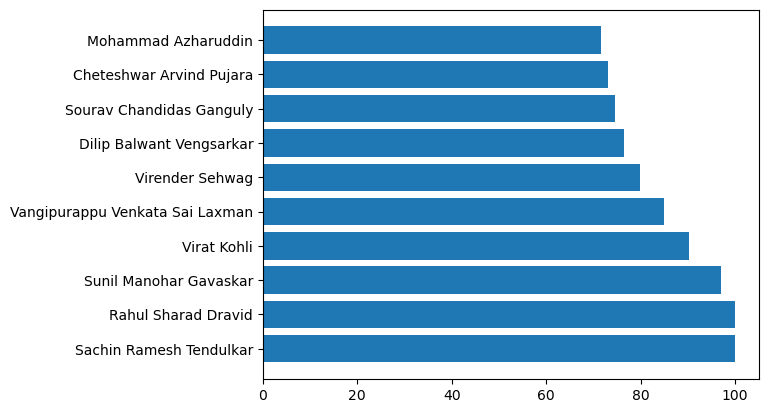

In [13]:
plt.barh(top_10['Player Name'],top_10['Final Batting Score']);

In [14]:
openers=batsmen[batsmen['Test Batting Pos']=='Openers'].head(10)

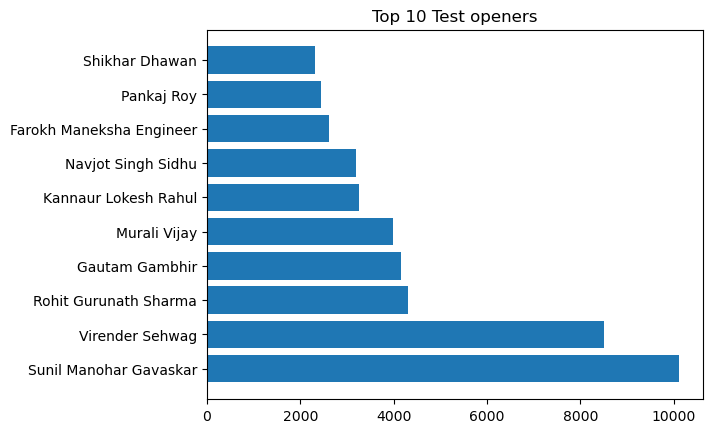

In [15]:
plt.title("Top 10 Test openers")
plt.barh(openers['Player Name'],openers['Runs']);

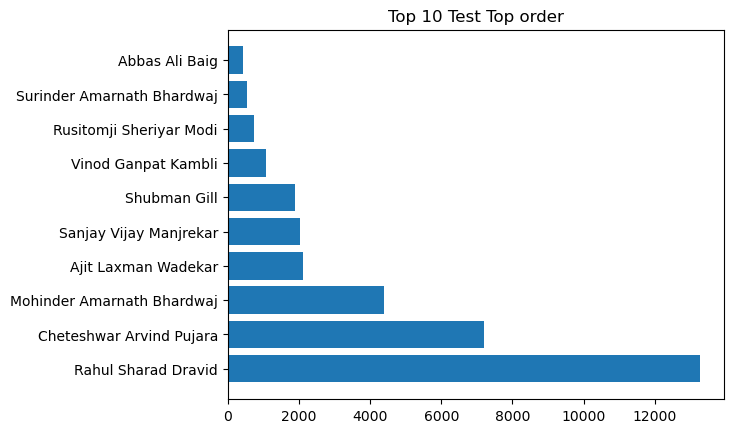

In [16]:
toporder=batsmen[batsmen['Test Batting Pos']=='Top Order'].head(10)
plt.title("Top 10 Test Top order")
plt.barh(toporder['Player Name'],toporder['Runs']);

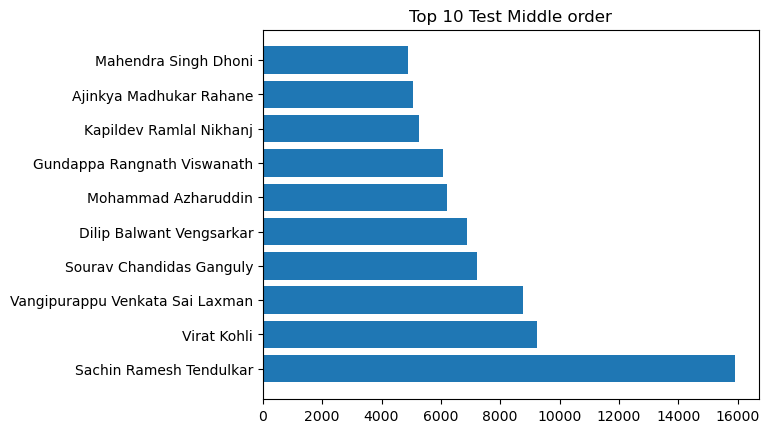

In [17]:
middleorder=batsmen[batsmen['Test Batting Pos']=='Middle Order'].head(10)
plt.title("Top 10 Test Middle order")
plt.barh(middleorder['Player Name'],middleorder['Runs']);

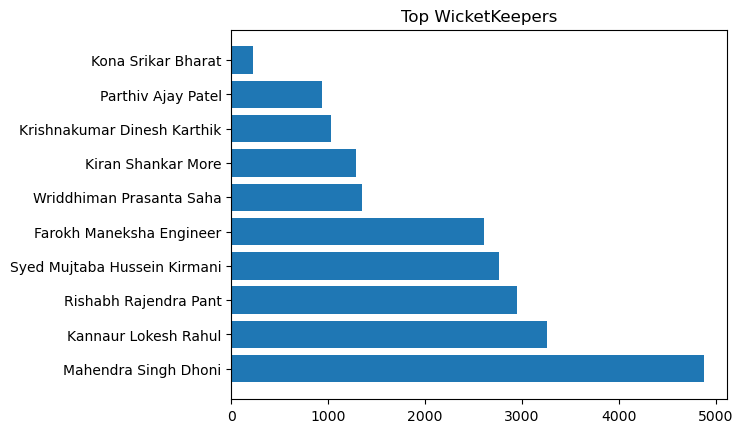

In [18]:
wicketkeeper=batsmen[batsmen['Playing Role']=='Wicketkeeper Batter'].head(10)
plt.title("Top WicketKeepers")
plt.barh(wicketkeeper['Player Name'],wicketkeeper['Runs']);

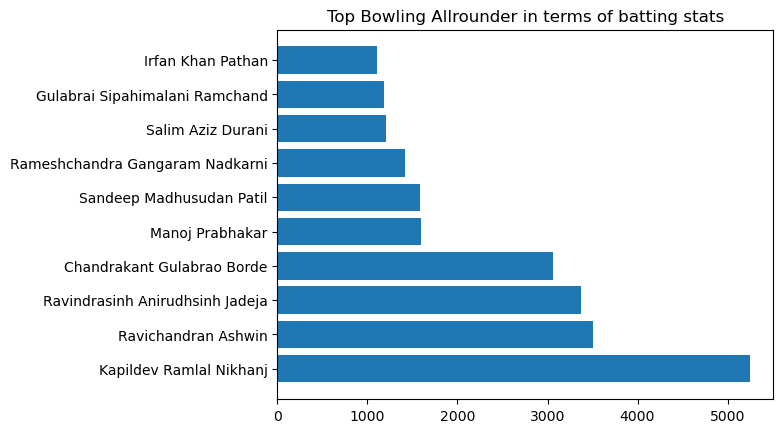

In [19]:
bowlall=batsmen[(batsmen['Playing Role']=='Bowling Allrounder') | (batsmen['Playing Role']=='Allrounder')].head(10)
plt.title("Top Bowling Allrounder in terms of batting stats")
plt.barh(bowlall['Player Name'],bowlall['Runs']);

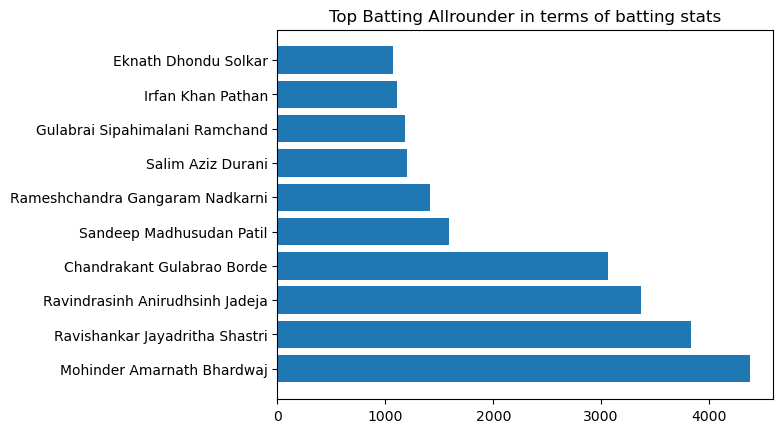

In [20]:
batall=batsmen[(batsmen['Playing Role']=='Batting Allrounder') | (batsmen['Playing Role']=='Allrounder')].head(10)
plt.title("Top Batting Allrounder in terms of batting stats")
plt.barh(batall['Player Name'],batall['Runs']);


# Bowling

In [21]:
df3=pd.read_excel('Cleaned_datasets/Test.xlsx',sheet_name='Bowling')
df3.head()

,Player ID,Matches,Innings,Wkts,Avg,Econ,SR,5,10
0,30176,132,236,619,29.65,2.69,65.9,35,8
1,26421,106,200,537,24.00,2.83,50.7,37,8
2,30028,131,227,434,29.64,2.78,63.9,23,2
3,29264,103,190,417,32.46,2.84,68.5,25,5
4,234675,80,150,323,24.14,2.53,57.1,15,3


In [22]:
bowlers=players.merge(df3,on='Player ID',how='right')

In [23]:
bowlers.head()

,Player ID,Player Name,Batting Style,Bowling Style,Playing Role,Test Batting Pos,ODI Batting Pos,T20I Batting Pos,Bowling Type,Matches,Innings,Wkts,Avg,Econ,SR,5,10
0,30176,Anil Kumble,Right hand Bat,Legbreak Googly,Bowler,Tail,Tail,NaN,Spin,132,236,619,29.65,2.69,65.9,35,8
1,26421,Ravichandran Ashwin,Right hand Bat,Right arm Offbreak,Bowling Allrounder,Tail,Tail,Tail,Spin,106,200,537,24.00,2.83,50.7,37,8
2,30028,Kapildev Ramlal Nikhanj,Right hand Bat,Right arm Fast medium,Bowling Allrounder,Middle Order,Middle Order,NaN,Right-arm Pacer,131,227,434,29.64,2.78,63.9,23,2
3,29264,Harbhajan Singh,Right hand Bat,Right arm Offbreak,Bowler,Tail,Tail,Tail,Spin,103,190,417,32.46,2.84,68.5,25,5
4,234675,Ravindrasinh Anirudhsinh Jadeja,Left hand Bat,Slow Left arm Orthodox,Allrounder,Middle Order,Middle Order,Middle Order,Spin,80,150,323,24.14,2.53,57.1,15,3


In [24]:
bowlers.set_index('Player ID',inplace=True)

In [25]:
bowlers.drop(['Batting Style','Test Batting Pos','ODI Batting Pos','T20I Batting Pos'],axis=1,inplace=True)

In [26]:
bowlers['Avg W/I']=(bowlers['Wkts']/bowlers['Innings'])

In [27]:
bowlers['Wkts Score']=((bowlers['Wkts']/500)*100).clip(upper=100)
bowlers['Avg Score']=((23/bowlers['Avg'])*100).clip(upper=100)
bowlers['Econ Score']=((2.5/bowlers['Econ'])*100).clip(upper=100)
bowlers['SR Score']=((50/bowlers['SR'])*100).clip(upper=100)
bowlers['Avg W/I Score']=((bowlers['Avg W/I']/1.5)*100).clip(upper=100)
bowlers['5 Score']=((bowlers['5']/20)*100).clip(upper=100)
bowlers['10 Score']=((bowlers['10']/5)*100).clip(upper=100)

In [28]:
bowlers['Final Bowling Score']=((0.30 * bowlers['Wkts Score']) + (0.20 * bowlers['Avg Score']) + (0.15 * bowlers['SR Score']) + (0.10 * bowlers['Econ Score']) + (0.10 * bowlers['Avg W/I Score']) + (0.10 * bowlers['5 Score']) + (0.05 * bowlers['10 Score'])).clip(upper=100)

In [29]:
bowlers.loc[bowlers['Innings'] < bowlers['Matches'],'Final Bowling Score'] = 0

In [30]:
bowlers.sort_values('Final Bowling Score',ascending=False,inplace=True)

In [31]:
bowlers[(bowlers['Playing Role']=='Bowler') | (bowlers['Playing Role']=='Bowling Allrounder') | (bowlers['Playing Role']=='Batting Allrounder')].head(10)

,Player Name,Bowling Style,Playing Role,Bowling Type,Matches,Innings,Wkts,Avg,Econ,SR,...,10,Avg W/I,Wkts Score,Avg Score,Econ Score,SR Score,Avg W/I Score,5 Score,10 Score,Final Bowling Score
Player ID,,,,,,,,,,,,,,,,,,,,,
26421,Ravichandran Ashwin,Right arm Offbreak,Bowling Allrounder,Spin,106,200,537,24.00,2.83,50.7,...,8,2.685000,100.0,95.833333,88.339223,98.619329,100.0,100.0,100.0,97.793488
30176,Anil Kumble,Legbreak Googly,Bowler,Spin,132,236,619,29.65,2.69,65.9,...,8,2.622881,100.0,77.571669,92.936803,75.872534,100.0,100.0,100.0,91.188894
30028,Kapildev Ramlal Nikhanj,Right arm Fast medium,Bowling Allrounder,Right-arm Pacer,131,227,434,29.64,2.78,63.9,...,2,1.911894,86.8,77.597841,89.928058,78.247261,100.0,100.0,40.0,84.289463
29264,Harbhajan Singh,Right arm Offbreak,Bowler,Spin,103,190,417,32.46,2.84,68.5,...,5,2.194737,83.4,70.856439,88.028169,72.992701,100.0,100.0,100.0,83.943010
625383,Jasprit Jasbirsingh Bumrah,Right arm Fast,Bowler,Right-arm Pacer,45,86,205,19.40,2.76,42.0,...,0,2.383721,41.0,100.000000,90.579710,100.000000,100.0,65.0,0.0,72.857971
27591,Bhagwath Subramanya Chandrasekhar,Legbreak,Bowler,Spin,58,97,242,29.74,2.70,65.9,...,2,2.494845,48.4,77.336920,92.592593,75.872534,100.0,80.0,40.0,70.627523
236779,Ishant Sharma,Right arm Fast medium,Bowler,Right-arm Pacer,105,188,311,32.40,3.15,61.6,...,1,1.654255,62.2,70.987654,79.365079,81.168831,100.0,55.0,20.0,69.469363
26875,Bishan Singh Bedi,Slow Left arm Orthodox,Bowler,Spin,67,118,266,28.71,2.14,80.3,...,1,2.254237,53.2,80.111459,100.000000,62.266501,100.0,70.0,20.0,69.322267
30102,Zaheer Khan,Left arm Fast medium,Bowler,Left-arm Pacer,92,165,311,32.94,3.27,60.4,...,1,1.884848,62.2,69.823922,76.452599,82.781457,100.0,55.0,20.0,69.187263


In [32]:
top_10=bowlers[(bowlers['Playing Role']=='Bowler') | (bowlers['Playing Role']=='Bowling Allrounder') | (bowlers['Playing Role']=='Batting Allrounder')].head(10)

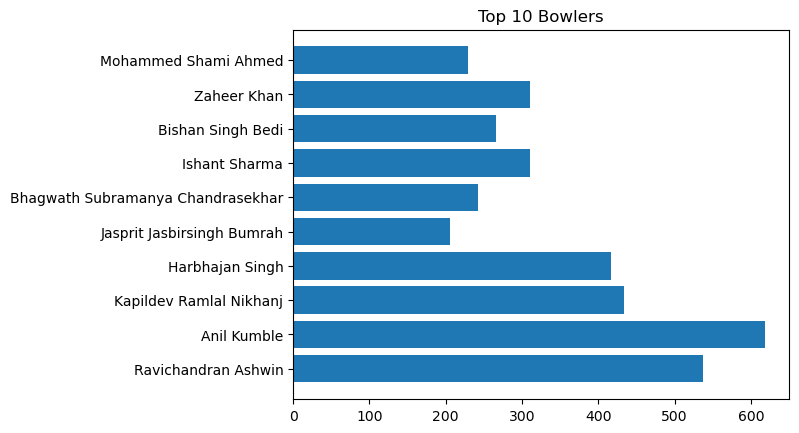

In [33]:
plt.title('Top 10 Bowlers')
plt.barh(top_10['Player Name'],top_10['Wkts']);

In [34]:
pacers=bowlers[((bowlers['Playing Role']=='Bowler') | (bowlers['Playing Role']=='Bowling Allrounder') | (bowlers['Playing Role']=='Allrounder') | (bowlers['Playing Role']=='Batting Allrounder'))& (bowlers['Bowling Type'].str.contains('Pacer',na=False))].head(10)

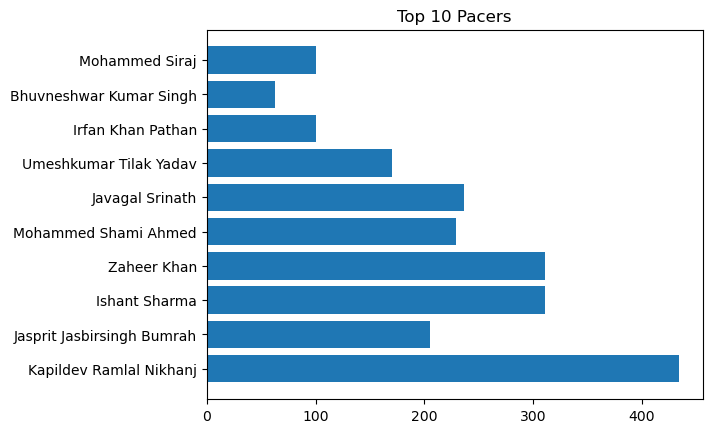

In [35]:
plt.title('Top 10 Pacers')
plt.barh(pacers['Player Name'],pacers['Wkts']);

In [36]:
spinners=bowlers[((bowlers['Playing Role']=='Bowler') | (bowlers['Playing Role']=='Bowling Allrounder') | (bowlers['Playing Role']=='Allrounder') | (bowlers['Playing Role']=='Batting Allrounder'))& (bowlers['Bowling Type']=='Spin')].head(10)

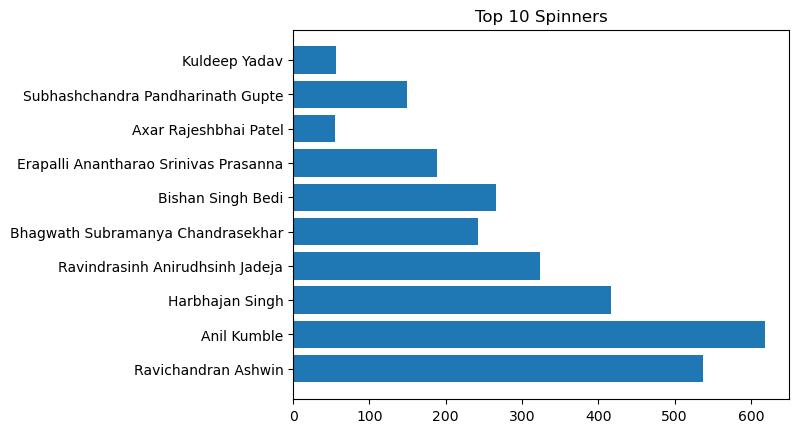

In [37]:
plt.title('Top 10 Spinners')
plt.barh(spinners['Player Name'],spinners['Wkts']);

# Fielding

In [38]:
df4=pd.read_excel('Cleaned_datasets/Test.xlsx',sheet_name='Fielding')
df4.head()

,Player ID,Matches,Innings,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I
0,28081,90,166,294,256,38,256,0,1.771
1,28114,163,299,209,209,0,0,209,0.698
2,30116,88,151,198,160,38,160,0,1.311
3,931581,43,85,164,149,15,149,0,1.929
4,30750,134,248,135,135,0,0,135,0.544


In [39]:
field=players[['Player ID','Player Name','Playing Role']].merge(df4,on='Player ID',how='right')

In [40]:
field.head()

,Player ID,Player Name,Playing Role,Matches,Innings,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I
0,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,90,166,294,256,38,256,0,1.771
1,28114,Rahul Sharad Dravid,Top order Batter,163,299,209,209,0,0,209,0.698
2,30116,Syed Mujtaba Hussein Kirmani,Wicketkeeper Batter,88,151,198,160,38,160,0,1.311
3,931581,Rishabh Rajendra Pant,Wicketkeeper Batter,43,85,164,149,15,149,0,1.929
4,30750,Vangipurappu Venkata Sai Laxman,Top order Batter,134,248,135,135,0,0,135,0.544


In [41]:
field.set_index('Player ID',inplace=True)

In [42]:
field.columns

Index(['Player Name', 'Playing Role', 'Matches', 'Innings', 'Dismissals',
       'Catches', 'Stumps', 'Ct Wk', 'Ct Fi', 'D/I'],
      dtype='object')

In [43]:
field['Stumpings Score'] = ((field['Stumps'] / 50) * 100).clip(upper=100)
field['Keeper Catches Score'] = ((field['Ct Wk'] / 100) * 100).clip(upper=100)
field['D/I keeper Score'] = ((field['D/I'] / 1.5) * 100).clip(upper=100)
field['Final Keeper Score'] = (((0.50 * field['Stumpings Score']) + (0.20 * field['D/I keeper Score']) + (0.30 * field['Keeper Catches Score']))).clip(upper=100)

In [44]:
field['D/I fielder Score'] = ((field['D/I'] / 0.5) * 100  ).clip(upper=100)
field['Fielding Catches Score'] = ((field['Ct Fi'] / 100) * 100).clip(upper=100)
field['Final Fielding Score'] = ( ((0.70 * field['Fielding Catches Score']) + (0.30 * field['D/I fielder Score']))).clip(upper=100)

In [45]:
field.head()

,Player Name,Playing Role,Matches,Innings,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I,Stumpings Score,Keeper Catches Score,D/I keeper Score,Final Keeper Score,D/I fielder Score,Fielding Catches Score,Final Fielding Score
Player ID,,,,,,,,,,,,,,,,,
28081,Mahendra Singh Dhoni,Wicketkeeper Batter,90,166,294,256,38,256,0,1.771,76.0,100.0,100.000000,88.000000,100.0,0.0,30.0
28114,Rahul Sharad Dravid,Top order Batter,163,299,209,209,0,0,209,0.698,0.0,0.0,46.533333,9.306667,100.0,100.0,100.0
30116,Syed Mujtaba Hussein Kirmani,Wicketkeeper Batter,88,151,198,160,38,160,0,1.311,76.0,100.0,87.400000,85.480000,100.0,0.0,30.0
931581,Rishabh Rajendra Pant,Wicketkeeper Batter,43,85,164,149,15,149,0,1.929,30.0,100.0,100.000000,65.000000,100.0,0.0,30.0
30750,Vangipurappu Venkata Sai Laxman,Top order Batter,134,248,135,135,0,0,135,0.544,0.0,0.0,36.266667,7.253333,100.0,100.0,100.0


In [46]:
field.sort_values('Final Fielding Score',ascending=False)[field['Matches']>50]

C:\Users\vighn\AppData\Local\Temp\ipykernel_14368\5964327.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  field.sort_values('Final Fielding Score',ascending=False)[field['Matches']>50]


,Player Name,Playing Role,Matches,Innings,Dismissals,Catches,Stumps,Ct Wk,Ct Fi,D/I,Stumpings Score,Keeper Catches Score,D/I keeper Score,Final Keeper Score,D/I fielder Score,Fielding Catches Score,Final Fielding Score
Player ID,,,,,,,,,,,,,,,,,
277916,Ajinkya Madhukar Rahane,Top order Batter,85,163,102,102,0,0,102,0.625,0.0,0.0,41.666667,8.333333,100.0,100.0,100.00
28114,Rahul Sharad Dravid,Top order Batter,163,299,209,209,0,0,209,0.698,0.0,0.0,46.533333,9.306667,100.0,100.0,100.00
30750,Vangipurappu Venkata Sai Laxman,Top order Batter,134,248,135,135,0,0,135,0.544,0.0,0.0,36.266667,7.253333,100.0,100.0,100.00
253802,Virat Kohli,Top order Batter,123,236,121,121,0,0,121,0.512,0.0,0.0,34.133333,6.826667,100.0,100.0,100.00
28794,Sunil Manohar Gavaskar,Opening Batter,125,216,108,108,0,0,108,0.500,0.0,0.0,33.333333,6.666667,100.0,100.0,100.00
26329,Mohammad Azharuddin,Middle order Batter,99,177,105,105,0,0,105,0.593,0.0,0.0,39.533333,7.906667,100.0,100.0,100.00
35263,Virender Sehwag,Top order Batter,103,190,90,90,0,0,90,0.473,0.0,0.0,31.533333,6.306667,94.6,90.0,91.38
35320,Sachin Ramesh Tendulkar,Top order Batter,200,366,115,115,0,0,115,0.314,0.0,0.0,20.933333,4.186667,62.8,100.0,88.84
35654,Dilip Balwant Vengsarkar,Top order Batter,116,202,78,78,0,0,78,0.386,0.0,0.0,25.733333,5.146667,77.2,78.0,77.76


In [47]:
batsmen.columns

Index(['Player Name', 'Batting Style', 'Bowling Style', 'Playing Role',
       'Test Batting Pos', 'ODI Batting Pos', 'T20I Batting Pos',
       'Bowling Type', 'Matches', 'Innings', 'NO', 'Runs', 'Avg', '100', '50',
       '0', 'Runs Score', 'Avg Score', '100 Score', 'NO Score',
       'Final Batting Score'],
      dtype='object')

# Allround

In [48]:
df5=pd.read_excel('Cleaned_datasets/Test.xlsx',sheet_name='Allround')
df5.head()

,Player ID,Allround Score
0,35320,-0.38
1,28114,13.63
2,28794,-154.87
3,30750,-17.02
4,35263,2.08


In [49]:
allround=batsmen[['Player Name','Playing Role','Bowling Type','Final Batting Score']].merge(
    bowlers['Final Bowling Score'],on='Player ID',how='outer'
).merge(
    field[['Final Fielding Score','Final Keeper Score']],on='Player ID',how='outer'
).merge(
    df5,on='Player ID',how='outer'
)

In [50]:
allround.fillna(0,inplace=True)
allround[allround['Allround Score']==0]

,Player ID,Player Name,Playing Role,Bowling Type,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score
7,26238,Pravin Kalyan Amre,Middle order Batter,Spin,33.941667,0.0,31.98,5.706667,0.0
9,26268,Arvindrao Laxmanrao Apte,0,Right-arm Pacer,5.295000,0.0,0.00,0.000000,0.0
10,26269,Madhavrao Laxmanrao Apte,0,Unknown,38.281667,0.0,11.36,2.213333,0.0
13,26295,Jagdishlal Arun Lal,Opening Batter,Right-arm Pacer,21.158000,0.0,35.08,5.773333,0.0
15,26329,Mohammad Azharuddin,Middle order Batter,Right-arm Pacer,71.582667,0.0,100.00,7.906667,0.0
...,...,...,...,...,...,...,...,...,...
308,1070168,Prithvi Pankaj Shaw,Opening Batter,Spin,32.092667,0.0,13.40,2.666667,0.0
309,1070173,Shubman Gill,Opening Batter,Spin,37.297333,0.0,41.26,5.280000,0.0
310,1119026,Devdutt Padikkal,Top order Batter,Spin,21.270000,0.0,31.40,6.666667,0.0
311,1151278,Yashasvi Bhupendra Kumar Jaiswal,Opening Batter,Spin,44.560667,0.0,44.00,7.200000,0.0


In [51]:
allround['Final Allround Score']=((0.5*(allround['Final Batting Score'])) + (0.5*(allround['Final Bowling Score'])))*(abs(allround['Allround Score'])/allround['Allround Score'])

In [52]:
allround.sort_values('Final Allround Score',ascending=False).head(10)

,Player ID,Player Name,Playing Role,Bowling Type,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score,Final Allround Score
16,26421,Ravichandran Ashwin,Bowling Allrounder,Spin,43.784000,97.793488,35.70,2.333333,1.75,70.788744
99,30028,Kapildev Ramlal Nikhanj,Bowling Allrounder,Right-arm Pacer,54.062333,84.289463,61.48,3.706667,1.40,69.175898
272,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Spin,52.094667,81.951784,49.84,3.920000,10.59,67.023225
50,28114,Rahul Sharad Dravid,Top order Batter,Spin,100.000000,0.000000,100.00,9.306667,13.63,50.000000
293,554691,Axar Rajeshbhai Patel,Allrounder,Spin,30.054000,61.760159,11.32,1.893333,16.54,45.907080
300,719715,Washington Sundar,Bowling Allrounder,Spin,34.932000,53.585978,12.06,2.213333,16.90,44.258989
244,35263,Virender Sehwag,Top order Batter,Spin,79.943333,0.000000,91.38,6.306667,2.08,39.971667
238,34211,Sarandeep Singh,0,Spin,30.979000,43.524692,12.70,2.666667,9.00,37.251846
288,447587,Jayant Yadav,Bowler,Spin,23.860667,47.637764,17.10,3.333333,1.93,35.749215
295,625371,Hardik Himanshu Pandya,Allrounder,Right-arm Pacer,24.915667,43.307792,24.88,4.440000,0.23,34.111729


In [53]:
allround['Batsmen Score']=(0.8*allround['Final Batting Score'])+(0.2*allround['Final Fielding Score'])

In [54]:
allround.sort_values('Batsmen Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,Bowling Type,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score,Final Allround Score,Batsmen Score
0,50,28114,Rahul Sharad Dravid,Top order Batter,Spin,100.000000,0.0,100.00,9.306667,13.63,50.000000,100.000000
1,249,35320,Sachin Ramesh Tendulkar,Top order Batter,Spin,100.000000,0.0,88.84,4.186667,-0.38,-50.000000,97.768000
2,64,28794,Sunil Manohar Gavaskar,Opening Batter,All-rounder (Pace & Spin),97.000000,0.0,100.00,6.666667,-154.87,-48.500000,97.600000
3,275,253802,Virat Kohli,Top order Batter,Right-arm Pacer,90.235000,0.0,100.00,6.826667,0.00,NaN,92.188000
4,121,30750,Vangipurappu Venkata Sai Laxman,Top order Batter,Spin,84.855333,0.0,100.00,7.253333,-17.02,-42.427667,87.884267
5,244,35263,Virender Sehwag,Top order Batter,Spin,79.943333,0.0,91.38,6.306667,2.08,39.971667,82.230667
6,15,26329,Mohammad Azharuddin,Middle order Batter,Right-arm Pacer,71.582667,0.0,100.00,7.906667,0.00,NaN,77.266133
7,251,35654,Dilip Balwant Vengsarkar,Top order Batter,Right-arm Pacer,76.428333,0.0,77.76,5.146667,0.00,NaN,76.694667
8,63,28779,Sourav Chandidas Ganguly,Batter,Right-arm Pacer,74.571667,0.0,70.16,4.546667,-10.35,-37.285833,73.689333
9,181,32540,Cheteshwar Arvind Pujara,Top order Batter,Spin,73.021667,0.0,66.06,4.413333,0.00,NaN,71.629333


In [55]:
allround['Bowler Score']=(0.7*allround['Final Bowling Score'])+(0.1*allround['Final Fielding Score'])+(0.2*allround['Final Batting Score'])

In [56]:
allround.sort_values('Bowler Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,Bowling Type,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score,Final Allround Score,Batsmen Score,Bowler Score
0,16,26421,Ravichandran Ashwin,Bowling Allrounder,Spin,43.784000,97.793488,35.70,2.333333,1.75,70.788744,42.167200,80.782242
1,114,30176,Anil Kumble,Bowler,Spin,35.623667,91.188894,56.82,3.293333,-11.87,-63.406280,39.862933,76.638959
2,99,30028,Kapildev Ramlal Nikhanj,Bowling Allrounder,Right-arm Pacer,54.062333,84.289463,61.48,3.706667,1.40,69.175898,55.545867,75.963091
3,272,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Spin,52.094667,81.951784,49.84,3.920000,10.59,67.023225,51.643733,72.769182
4,76,29264,Harbhajan Singh,Bowler,Spin,35.759333,83.943010,42.48,2.906667,-14.23,-59.851172,37.103467,70.159973
5,296,625383,Jasprit Jasbirsingh Bumrah,Bowler,Right-arm Pacer,20.938000,72.857971,22.06,2.413333,-12.33,-46.897986,21.162400,57.394180
6,33,27591,Bhagwath Subramanya Chandrasekhar,Bowler,Spin,18.350000,70.627523,32.20,3.266667,-25.67,-44.488762,21.120000,56.329266
7,26,26875,Bishan Singh Bedi,Bowler,Spin,23.254000,69.322267,31.04,2.853333,-19.72,-46.288133,24.811200,56.280387
8,105,30102,Zaheer Khan,Bowler,Left-arm Pacer,27.058000,69.187263,19.84,1.453333,-20.99,-48.122631,25.614400,55.826684
9,273,236779,Ishant Sharma,Bowler,Right-arm Pacer,23.137000,69.469363,23.18,1.573333,-24.14,-46.303182,23.145600,55.573954


In [57]:
allround['Allrounder Score']=(0.8*allround['Final Allround Score'])+(0.2*allround['Final Fielding Score'])

In [58]:
allround.sort_values('Allrounder Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,Bowling Type,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score,Final Allround Score,Batsmen Score,Bowler Score,Allrounder Score
0,99,30028,Kapildev Ramlal Nikhanj,Bowling Allrounder,Right-arm Pacer,54.062333,84.289463,61.48,3.706667,1.40,69.175898,55.545867,75.963091,67.636719
1,16,26421,Ravichandran Ashwin,Bowling Allrounder,Spin,43.784000,97.793488,35.70,2.333333,1.75,70.788744,42.167200,80.782242,63.770995
2,272,234675,Ravindrasinh Anirudhsinh Jadeja,Allrounder,Spin,52.094667,81.951784,49.84,3.920000,10.59,67.023225,51.643733,72.769182,63.586580
3,50,28114,Rahul Sharad Dravid,Top order Batter,Spin,100.000000,0.000000,100.00,9.306667,13.63,50.000000,100.000000,30.000000,60.000000
4,244,35263,Virender Sehwag,Top order Batter,Spin,79.943333,0.000000,91.38,6.306667,2.08,39.971667,82.230667,25.126667,50.253333
5,293,554691,Axar Rajeshbhai Patel,Allrounder,Spin,30.054000,61.760159,11.32,1.893333,16.54,45.907080,26.307200,50.374912,38.989664
6,300,719715,Washington Sundar,Bowling Allrounder,Spin,34.932000,53.585978,12.06,2.213333,16.90,44.258989,30.357600,45.702584,37.819191
7,238,34211,Sarandeep Singh,0,Spin,30.979000,43.524692,12.70,2.666667,9.00,37.251846,27.323200,37.933084,32.341477
8,295,625371,Hardik Himanshu Pandya,Allrounder,Right-arm Pacer,24.915667,43.307792,24.88,4.440000,0.23,34.111729,24.908533,37.786588,32.265383
9,288,447587,Jayant Yadav,Bowler,Spin,23.860667,47.637764,17.10,3.333333,1.93,35.749215,22.508533,39.828568,32.019372


In [59]:
allround['Keeper Score']=(0.7*allround['Final Keeper Score'])+(0.3*allround['Final Batting Score'])

In [60]:
allround.sort_values('Keeper Score',ascending=False).head(10).reset_index()

,index,Player ID,Player Name,Playing Role,Bowling Type,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score,Final Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
0,45,28081,Mahendra Singh Dhoni,Wicketkeeper Batter,Right-arm Pacer,57.291000,0.0,30.0,88.000000,0.00,NaN,51.832800,14.458200,NaN,78.787300
1,106,30116,Syed Mujtaba Hussein Kirmani,Wicketkeeper Batter,Spin,43.538333,0.0,30.0,85.480000,14.04,21.769167,40.830667,11.707667,23.415333,72.897500
2,306,931581,Rishabh Rajendra Pant,Wicketkeeper Batter,Unknown,46.071000,0.0,30.0,65.000000,0.00,NaN,42.856800,12.214200,NaN,59.321300
3,139,31038,Kiran Shankar More,Wicketkeeper Batter,Spin,32.345000,0.0,30.0,69.253333,0.00,NaN,31.876000,9.469000,NaN,58.180833
4,277,279810,Wriddhiman Prasanta Saha,Wicketkeeper Batter,Unknown,34.146000,0.0,30.0,57.600000,0.00,NaN,33.316800,9.829200,NaN,50.563800
5,138,31036,Nayan Ramlal Mongia,Wicketkeeper,Unknown,27.813667,0.0,30.0,56.220000,0.00,NaN,28.250933,8.562733,NaN,47.698100
6,54,28624,Farokh Maneksha Engineer,Wicketkeeper Batter,Spin,33.172333,0.0,30.0,48.960000,0.00,NaN,32.537867,9.634467,NaN,44.223700
7,169,32242,Parthiv Ajay Patel,Wicketkeeper Batter,Spin,30.593000,0.0,30.0,48.600000,0.00,NaN,30.474400,9.118600,NaN,43.197900
8,50,28114,Rahul Sharad Dravid,Top order Batter,Spin,100.000000,0.0,100.0,9.306667,13.63,50.000000,100.000000,30.000000,60.000000,36.514667
9,247,35308,Narendra Shankar Tamhane,0,Unknown,11.579000,0.0,30.0,45.926667,0.00,NaN,15.263200,5.315800,NaN,35.622367


In [61]:
allround.fillna(0,inplace=True)

In [62]:
allround.drop(['Player Name','Playing Role','Bowling Type'],axis=1,inplace=True)

In [63]:
allround.head()

,Player ID,Final Batting Score,Final Bowling Score,Final Fielding Score,Final Keeper Score,Allround Score,Final Allround Score,Batsmen Score,Bowler Score,Allrounder Score,Keeper Score
0,26169,19.556000,37.882242,52.40,8.040000,-21.76,-28.719121,26.124800,35.668769,-12.495297,11.494800
1,26179,31.080667,0.000000,21.56,3.546667,3.80,15.540333,29.176533,8.372133,16.744267,11.806867
2,26184,17.882667,38.442050,11.70,1.666667,-30.53,-28.162358,16.646133,31.655968,-20.189887,6.531467
3,26223,23.366667,44.210726,26.12,6.060000,-8.52,-33.788697,23.917333,38.232842,-21.806957,11.252000
4,26225,57.717333,28.339980,57.38,5.440000,-13.18,-43.028657,57.649867,37.119453,-22.946925,21.123200


In [64]:
allround.to_csv('Test_Scores.csv',index=False)